<a href="https://colab.research.google.com/github/markmorr/general/blob/main/Image_Colorization_Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import math
import timeit
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import os
import platform
from subprocess import check_output
import keras
import scipy as sp
import seaborn as sns
import tensorflow as tf
import tqdm
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras.layers import (
    Activation,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
    Reshape,
    Softmax,
)


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from scipy.spatial.distance import euclidean
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.python.client import device_lib
from keras.datasets import cifar10

import random
from random import randrange


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
#part b ##############
def collect_all_birds(images,labels):
   
    indexes = np.argwhere(labels == 2)
    indexes = indexes[:,0]
    #it yields a 2 column array for some reason--just extract the first one
    index_list = list(indexes)
    #for i in index_list: didn't work
     # samples = x[i]
    samples = [images[i] for i in index_list]
    return samples


x_train_ = collect_all_birds(x_train, y_train)
x_test_ = collect_all_birds(x_test, y_test)
print(x_train.size)

153600000


In [ ]:
#print shape to prove it's the right shape!*

#print shape to show it worked in google colab
tb = np.concatenate((x_train, x_test))
print(tb.size)

#thanks for the helpful error message numpy

184320000


In [ ]:
RGB_vectors = np.zeros(shape=(6000,3))
for i in range(0,6000):
  for j in range(0,32):
    for k in range(0,32):
      RGB_vectors[i] = tb[i][j][k]
print(RGB_vectors.shape)
print(RGB_vectors[0])

(6000, 3)
[123.  92.  72.]


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=0).fit(RGB_vectors)
kmeans_output = kmeans.labels_   
main_colors = kmeans.cluster_centers_ #this  is stupidly named

import math
from scipy.spatial import distance
tetrachrome = np.zeros(shape=(6000,32,32,3))
#convert to integers 
main_colors = main_colors.astype(int)
print(main_colors)

[[102 102  85]
 [226 225 221]
 [158 154 141]
 [ 43  42  36]]


In [ ]:
  
 
for i in range(0,6000):
    for j in range(0,32):
        for k in range(0,32):
            min_dist = 441.67
            best_color_index = 0
            for u in range(0,4):
                
                dist = distance.euclidean(tb[i][j][k], main_colors[u])
                if dist < min_dist:
                    min_dist = dist
                    best_color_index = u
            tetrachrome[i][j][k] = main_colors[best_color_index]
            
print('done!!!!!!!!!')

done!!!!!!!!!


In [ ]:
tetrachrome = tetrachrome.astype(int)
for x in range(0,10):
  print(tetrachrome[x][1][1])

[43 42 36]
[158 154 141]
[226 225 221]
[43 42 36]
[158 154 141]
[102 102  85]
[102 102  85]
[43 42 36]
[158 154 141]
[158 154 141]


first 10 images


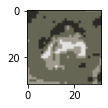

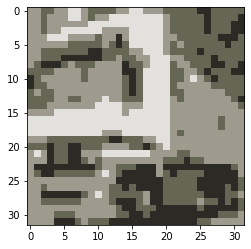

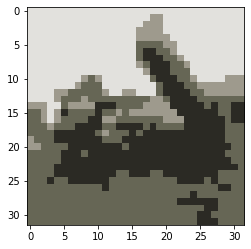

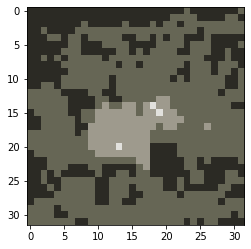

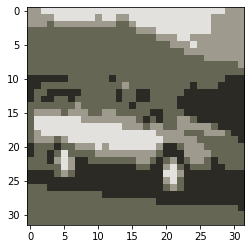

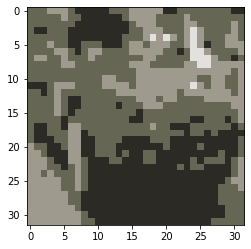

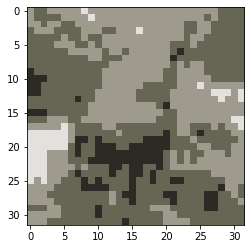

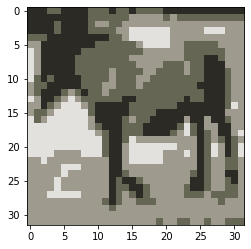

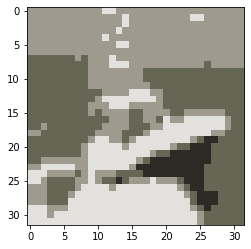

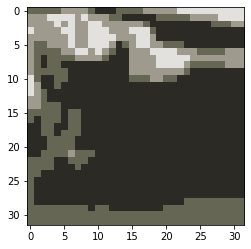

In [ ]:
print("first 10 images")
fig = plt.figure(figsize = (9,3))
for i in range(0,10):
    ax = fig.add_subplot(2,5,i+1)
    plt.imshow(tetrachrome[i])
    plt.show()

#ok so gotta 

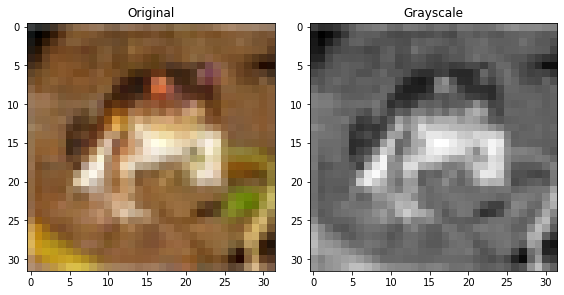

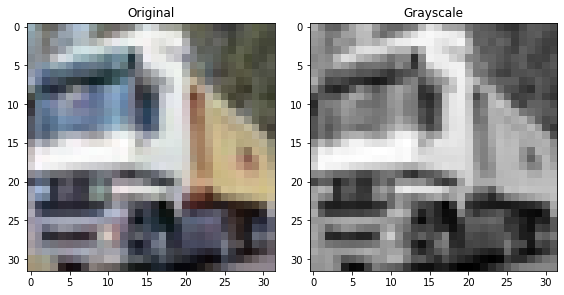

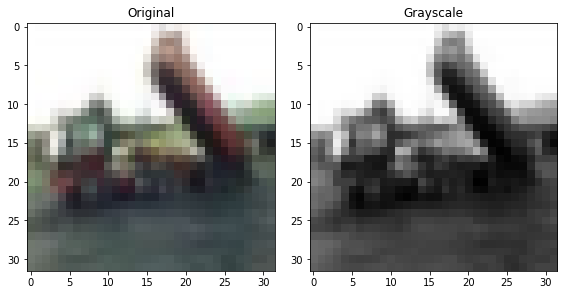

In [ ]:
#source: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html
#Part e 
from skimage.color import rgb2gray
grayscale = np.zeros(shape = (6000,32,32))

for i in range(0,6000):
    original = tb[i]
    grayscale[i] = rgb2gray(original)

for i in range(0,3):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    
    ax[0].imshow(tb[i])
    ax[0].set_title("Original")
    ax[1].imshow(grayscale[i], cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")
    
    fig.tight_layout()
    plt.show()
    

    


In [ ]:
#using resource: https://keras.io/examples/cifar10_cnn/

epochs = 5
number_of_classes = 4
from keras.utils import to_categorical
#one-hot encode target column
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)


model = Sequential()
#sequential lets us build the model layer by layer

model.add(Conv2D(32, (5,5), padding='same',
                 input_shape=x_train.shape[1:]))
#why does it have to be shape[1:]?
#first layer
model.add(Activation('relu'))
model.add(Conv2D(32, (5,5))) 

#2nd layer
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Activation('relu'))
#ConV2D because our images are represented 2D; 5x5 is the mask shape (filter shape?)

#3rd layer (MLP??)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

#4th layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes))
model.add(Activation('softmax'))
#softmax output

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)

# it didn't like loss = cross_entropy for some reason!
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])




In [ ]:
#Issues running
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
test_scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])
train_scores = model.evaluate(x_train, y_train, verbose=1)

ValueError: ignored